---
title: "Docker notes"
description: Docker notes
date: 2024-08
categories: [Programming]
---

- Containers are isolated environments using the kernel of your host OS
    - They are running instances of images which are "blueprints" or snapshots for containers
    - They are build in layers, which can be used across multiple images
- Images ~ Classes: Specified via Dockerfile
- Containers ~ Objects: instantiations of images
- Dockerfile: Text document containing commands user would call on the command line to assemble an image



- Basic Dockerfile launching a shell with Python 3.8 available:

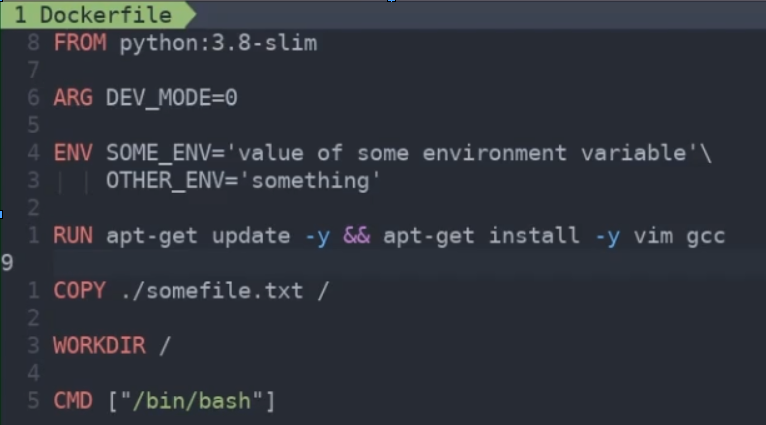

- Anything below a changed line runs so it’s important to specify frequently-changing commands at the bottom of the file, non frequently used at the top.  Reduces Docker runtime
- Each command creates a new *layer*.  Keeping the number of layers as low as possible will keep image size down -> Use \ as shown above for ENV  and && for RUN + follow install with multiple things to install


- Dockerfile definitions:

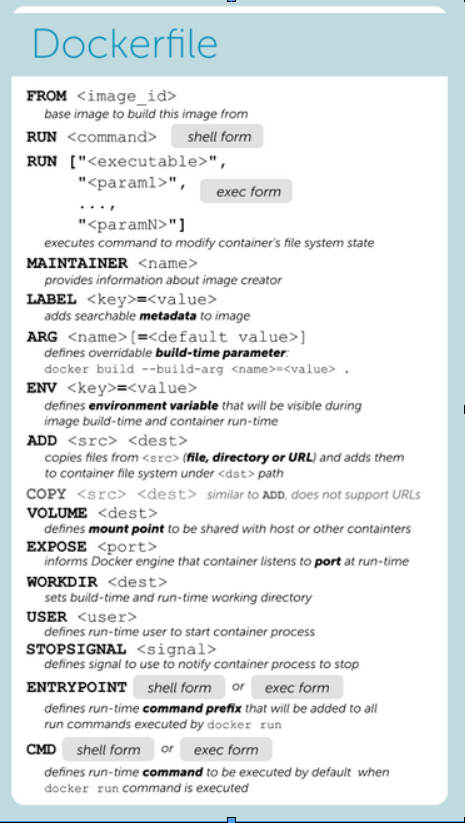

## Docker ABCs: Running a simple application with Docker volume to persist data

- Step 1: Create Dockerfile

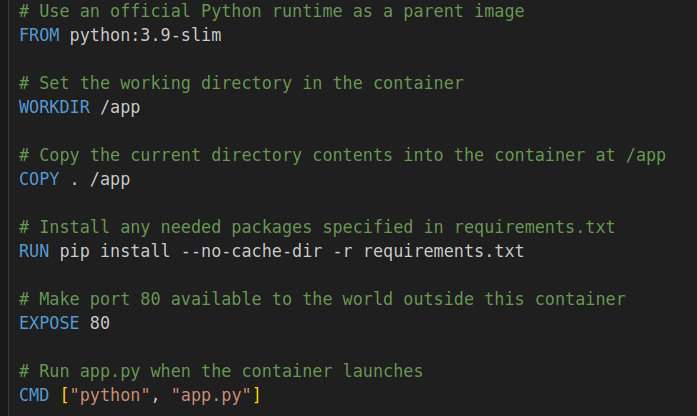

- Step 2: Create simple Python application

In [ ]:
# app.py
import os
import time

# Create a file and write some content to it
with open("output.txt", "a") as f:
    f.write(f"Hello from Docker!\nTime: {time.time()}\n")

print("File written successfully.")

- Step 3: Create requirements.txt to specify Python dependencies.

- Step 4: Build the Docker image using Dockerfile and name it (here my-python-app)

In [ ]:
%%bash
docker build -t my-python-app .

- Step 5: Run the Docker image with a volume

In [ ]:
%%bash
docker run -v $(pwd):/app my-python-app

- Can also run interactively and run from shell from inside a container:
    - When run the container, application will write message + time
    - Can run `python app.py` from inside the container, which will keep appending to the file
    - `exit` and the changes will persist

In [ ]:
%%bash
docker run -it --name my-python-app-container -v $(pwd):/app my-python-app /bin/bash

- Don't forget to remove the container with `docker rm my-python-app-container`, or *better yet*, run with rm flag as below:

In [ ]:
%%bash
docker run --rm -it --name my-python-app-container -v $(pwd):/app my-python-app /bin/bash